In [29]:
#Sources 

# https://en.wikipedia.org/wiki/Rotation_matrix
# https://docs.opencv.org/3.4/d4/d94/tutorial_camera_calibration.html
# 

import numpy as np
import math as m
import matplotlib.pyplot as plt
import os

np.set_printoptions(suppress=True,
                    formatter={'float_kind': '{:f},'.format})

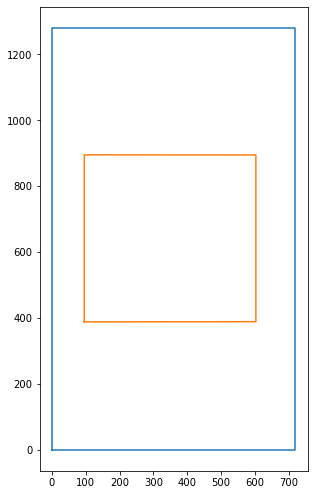

[95.793572, 388.035160,]
[603.219909, 388.619351,]
[603.219909, 894.543755,]
[95.793572, 895.127946,]
[95.793572, 388.035160,]




In [30]:
image_info =  np.loadtxt(fname= os.getcwd() +  '/storage/image_info.txt', delimiter=',')
w = image_info[0]
h = image_info[1]

image_points = [
    np.array([0, 0]),
    np.array([w, 0]),
    np.array([w, h]),
    np.array([0, h]),
    np.array([0, 0]),
]


opencv_mtx = np.loadtxt(fname= os.getcwd() + '/storage/opencv_matrix.txt', delimiter=',')

# print(opencv_mtx)

xpos = 0.0
ypos = 0.0

xrot = 0    #degrees
yrot = 60    #degrees

xrad = xrot * m.pi/180
yrad = yrot * m.pi/180

cx = 0.2/m.cos(xrad)
cy = 0.2/m.cos(yrad)

ax = m.sqrt(m.pow(cx,2)-m.pow(0.2,2))
ay = m.sqrt(m.pow(cy,2)-m.pow(0.2,2))

if(xrot < 0):
    ax = -ax

if(yrot < 0):
    ay = -ay

world_points = [
    [
        np.array([-40 + xpos, -40 + ypos, 150 + ax]),  #bottom left
        np.array([40 + xpos, -40 + ypos, 150 + ax + ay]),   #bottom right
        np.array([40 + xpos, 40 + ypos, 150 +ay]),    #top right 
        np.array([-40 + xpos, 40 + ypos, 150])    #top left
    ],
]

screen_points = []

for set in world_points:
    point_set = []
    for p in set:
        
        screen_point = opencv_mtx.dot(p)/p[2]
        
        point_set.append(np.array([screen_point[0], screen_point[1]]))
        
    point_set.append(point_set[0])
    screen_points.append(point_set)
   
# print('opencv_mtx= ', opencv_mtx, '\n')
# print(screen_points)

xs, ys = zip(*image_points) #create lists of x and y values


scale = 150

plt.figure(figsize=(w/scale,h/scale))
plt.plot(xs,ys)

for set in screen_points:
    xs1, ys1 = zip(*set)
    plt.plot(xs1,ys1)  

plt.show() # if you need...

for set in screen_points:
    for p in set:
        print(p)
    print('\n')